# First Analysis #

Spotify API - Comparison of two different playslists

In [31]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

# Initialize SpotiPy with your credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

print("Successfully connected to the Spotify API!")

Successfully connected to the Spotify API!


In [32]:
# Search for playlists containing "Top Hits"
playlist_results = sp.search(q="Top 100", type="playlist", limit=1)

# Initialize variables to store our findings
playlist_id = None
playlist_name = None

# Check that the API returned a dictionary with the 'playlists' key
if playlist_results and 'playlists' in playlist_results:
    # Iterate through the found playlists to find the first valid one
    for playlist in playlist_results['playlists']['items']:
        # This check is crucial: ensure the playlist item is not empty ('None')
        if playlist:
            playlist_id = playlist['id']
            playlist_name = playlist['name']
            # Once we find a valid playlist, break the loop
            break 

# Finally, check if we successfully found a playlist
if playlist_id:
    print(f"Success! Found playlist: '{playlist_name}'")
    print(f"Its ID is: {playlist_id}")
else:
    print("Could not find any valid playlists with that name. Try a different search term!")

Success! Found playlist: 'Top 100 most streamed songs on Spotify *Updated*'
Its ID is: 5ABHKGoOzxkaa28ttQV9sE


In [33]:
# Use the playlist_id we just found to get all the tracks
results = sp.playlist_tracks(playlist_id)

song_data = []

# Loop through each track in the playlist's items
for item in results['items']:
    track = item['track']
    
    # Make sure the track is not None (another safety check!)
    if track:
        song_info = {
            'name': track['name'],
            'id': track['id'],
            'popularity': track['popularity'],
            'artists': [artist['name'] for artist in track['artists']]
        }
        song_data.append(song_info)

print(f"Collected data for {len(song_data)} songs!")

Collected data for 100 songs!


In [34]:
# Convert your list of dictionaries into a DataFrame
hits_df = pd.DataFrame(song_data)

# Display the first few rows to see what it looks like
hits_df.head()

,name,id,popularity,artists
0,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,89,[The Weeknd]
1,Shape of You,7qiZfU4dY1lWllzX7mPBI3,88,[Ed Sheeran]
2,Starboy,5aAx2yezTd8zXrkmtKl66Z,3,"[The Weeknd, Daft Punk]"
3,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,87,[Lewis Capaldi]
4,As It Was,4Dvkj6JhhA12EX05fT7y2e,87,[Harry Styles]


In [35]:
# Get descriptive statistics for the 'popularity' column
hits_df['popularity'].describe()

count    100.000000
mean      61.290000
std       32.961347
min        1.000000
25%       35.500000
50%       81.000000
75%       86.000000
max       94.000000
Name: popularity, dtype: float64

In [36]:
# Search for a jazz playlist
playlist_results = sp.search(q="Jazz Classics", type="playlist", limit=5)

# Initialize variables
jazz_playlist_id = None
jazz_playlist_name = None

# Find the first valid playlist from the results
if playlist_results and 'playlists' in playlist_results:
    for playlist in playlist_results['playlists']['items']:
        # This check is crucial: ensure the playlist item is not empty
        if playlist:
            jazz_playlist_id = playlist['id']
            jazz_playlist_name = playlist['name']
            # Once we find a valid playlist, break the loop
            break 

if jazz_playlist_id:
    print(f"Success! Found playlist: '{jazz_playlist_name}'")
    print(f"Its ID is: {jazz_playlist_id}")
else:
    print("Could not find a valid jazz playlist. Try another search term!")

Success! Found playlist: 'Classic jazz blues and soul '
Its ID is: 2uGtHlsrXprWFdIf7jqYsV


In [37]:
# --- Make sure you have the jazz playlist ID from the last step ---
jazz_playlist_id = '2uGtHlsrXprWFdIf7jqYsV' 
# ----------------------------------------------------------------

# Use the new ID to get the tracks
results = sp.playlist_tracks(jazz_playlist_id)

jazz_song_data = []

# Loop through each track and collect its data
for item in results['items']:
    track = item['track']
    if track: # Safety check for empty items
        song_info = {
            'name': track['name'],
            'id': track['id'],
            'popularity': track['popularity'],
            'artists': [artist['name'] for artist in track['artists']]
        }
        jazz_song_data.append(song_info)

# Create the second DataFrame for the jazz songs
jazz_df = pd.DataFrame(jazz_song_data)

print(f"Collected data for {len(jazz_df)} jazz songs!")
jazz_df.head()

Collected data for 90 jazz songs!


,name,id,popularity,artists
0,Feeling Good,6Rqn2GFlmvmV4w9Ala0I1e,74,[Nina Simone]
1,Lean on Me,3M8FzayQWtkvOhqMn2V4T2,72,[Bill Withers]
2,Sweet Love,6Ycf7Ch2VlEKlORbz7yfpJ,61,[Anita Baker]
3,Let's Get It On,4WGENqnUmbv0Ml9NwXMlsD,0,[Marvin Gaye]
4,The Real Thing,1rYcIDgY5K5qO1gTdEwSYK,55,[Lisa Stansfield]


In [38]:
# Add the target variable 'is_hit' to each DataFrame
# 1 = Hit, 0 = Not a Hit
hits_df['is_hit'] = 1
jazz_df['is_hit'] = 0

# Combine the two DataFrames into one master DataFrame
combined_df = pd.concat([hits_df, jazz_df], ignore_index=True)

# --- Verification Steps ---
# Check the shape of our new DataFrame
print(f"Shape of the combined DataFrame: {combined_df.shape}")

# Check the distribution of our target variable
print("\nDistribution of Hits vs. Non-Hits:")
print(combined_df['is_hit'].value_counts())

Shape of the combined DataFrame: (190, 5)

Distribution of Hits vs. Non-Hits:
is_hit
1    100
0     90
Name: count, dtype: int64


In [39]:
# Group by the 'is_hit' column and get statistics for 'popularity' in each group
combined_df.groupby('is_hit')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
is_hit,,,,,,,,
0,90.0,46.844444,25.269741,0.0,32.0,53.5,67.75,81.0
1,100.0,61.290000,32.961347,1.0,35.5,81.0,86.00,94.0


In [40]:
# Save the final DataFrame to a CSV file
# combined_df.to_csv('spotify_song_data.csv', index=False)

# print("DataFrame successfully saved to 'spotify_song_data.csv'!")

In [42]:
# Compare the popularity stats for hits (1) and non-hits (0)
popularity_comparison = combined_df.groupby('is_hit')['popularity'].describe()

print("--- Statistical Comparison of Popularity ---")
print(popularity_comparison)

--- Statistical Comparison of Popularity ---
        count       mean        std  min   25%   50%    75%   max
is_hit                                                           
0        90.0  46.844444  25.269741  0.0  32.0  53.5  67.75  81.0
1       100.0  61.290000  32.961347  1.0  35.5  81.0  86.00  94.0


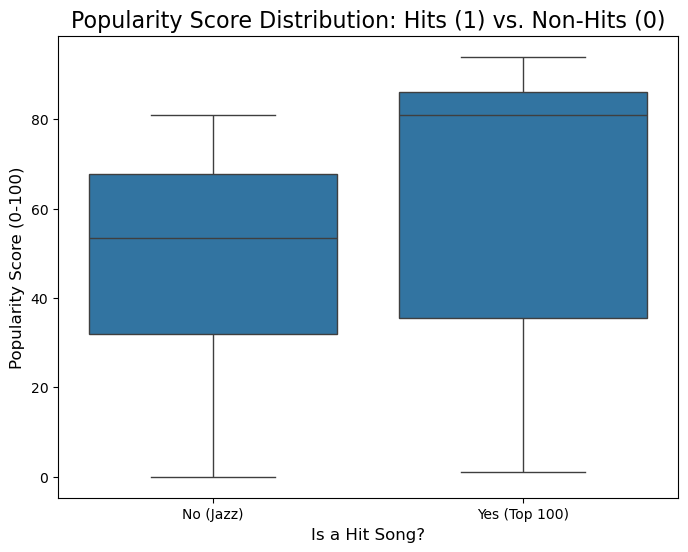

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_hit', y='popularity', data=combined_df)
plt.title('Popularity Score Distribution: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel("Is a Hit Song?", fontsize=12)
plt.ylabel("Popularity Score (0-100)", fontsize=12)
plt.xticks([0, 1], ['No (Jazz)', 'Yes (Top 100)'])
plt.show()

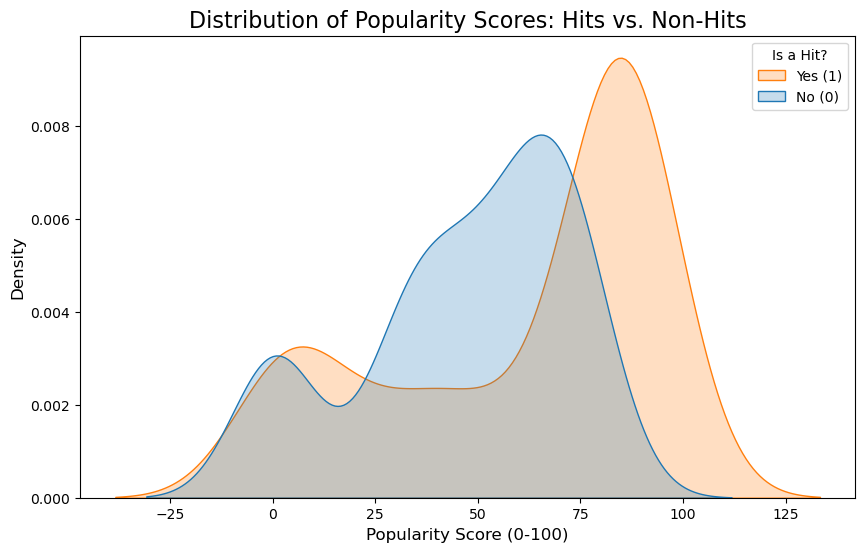

In [44]:
plt.figure(figsize=(10, 6))
# Use `hue` to create a separate distribution plot for each 'is_hit' category
sns.kdeplot(data=combined_df, x='popularity', hue='is_hit', fill=True)
plt.title('Distribution of Popularity Scores: Hits vs. Non-Hits', fontsize=16)
plt.xlabel("Popularity Score (0-100)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title='Is a Hit?', labels=['Yes (1)', 'No (0)'])
plt.show()

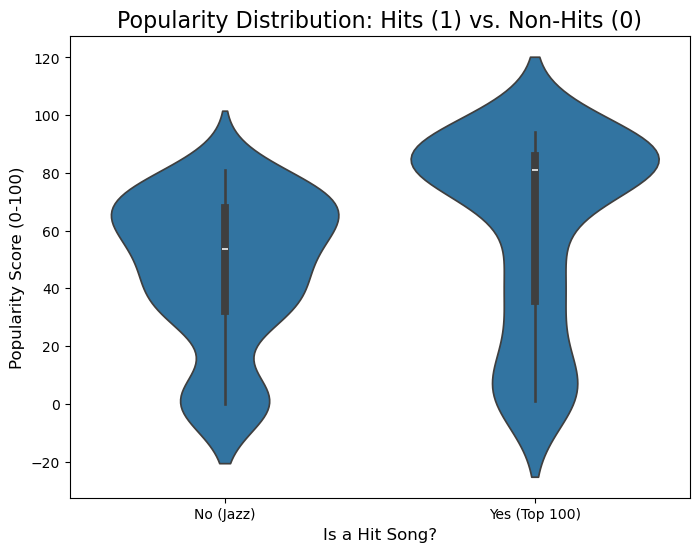

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_hit', y='popularity', data=combined_df)
plt.title('Popularity Distribution: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel("Is a Hit Song?", fontsize=12)
plt.ylabel("Popularity Score (0-100)", fontsize=12)
plt.xticks([0, 1], ['No (Jazz)', 'Yes (Top 100)'])
plt.show()

--- Top 5 Songs from Each Category by Popularity ---


,name,artists,popularity,is_hit
38,BIRDS OF A FEATHER,[Billie Eilish],94,1
46,Die With A Smile,"[Lady Gaga, Bruno Mars]",92,1
76,Iris,[The Goo Goo Dolls],92,1
5,Sweater Weather,[The Neighbourhood],91,1
20,I Wanna Be Yours,[Arctic Monkeys],91,1
111,Ain't No Sunshine,[Bill Withers],81,0
117,My Girl,[The Temptations],80,0
164,Family Affair,[Mary J. Blige],80,0
160,(Sittin' On) the Dock of the Bay,[Otis Redding],77,0
125,At Last,[Etta James],76,0


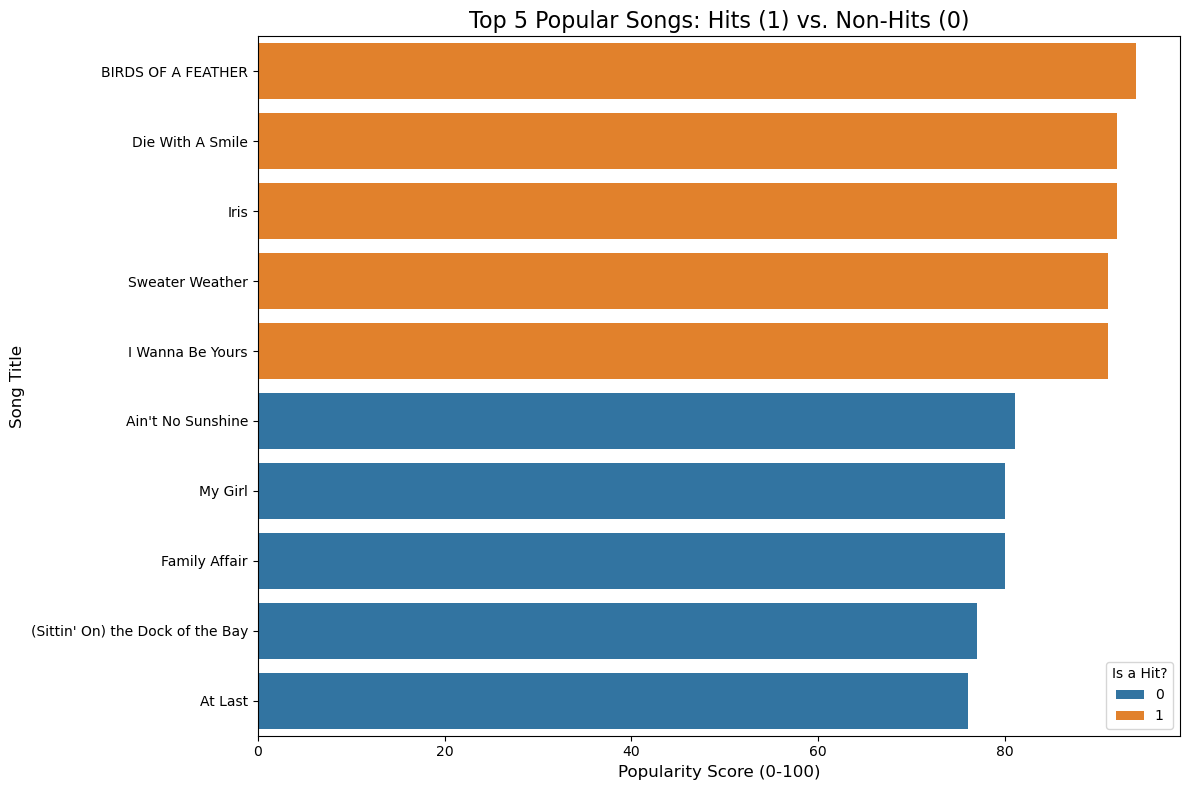

In [46]:
# Separate the hits and non-hits
hits = combined_df[combined_df['is_hit'] == 1]
non_hits = combined_df[combined_df['is_hit'] == 0]

# Get the top 5 most popular from each group
top_5_hits = hits.nlargest(5, 'popularity')
top_5_non_hits = non_hits.nlargest(5, 'popularity')

# Combine the top 5s into a new DataFrame for plotting
comparison_df = pd.concat([top_5_hits, top_5_non_hits])

# --- Display the Pivot Table ---
print("--- Top 5 Songs from Each Category by Popularity ---")
display(comparison_df[['name', 'artists', 'popularity', 'is_hit']])

# --- Create the Bar Chart ---
plt.figure(figsize=(12, 8))
sns.barplot(data=comparison_df, x='popularity', y='name', hue='is_hit', dodge=False)

plt.title('Top 5 Popular Songs: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel('Popularity Score (0-100)', fontsize=12)
plt.ylabel('Song Title', fontsize=12)
plt.legend(title='Is a Hit?')
plt.tight_layout() # Adjust layout to make sure labels fit
plt.show()